### Подключение модулей

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [73]:
import tensorflow as tf
from tensorflow import keras

Целью этого проекта является прогнозирование и анализ цен продажи жилья в США. Требуется построить регрессионную и нейронную модель для прогнозирования цен на жилье в США на основе различных факторов.



### Загрузка данных

In [74]:
df = pd.read_csv('USA_Housing.csv')

In [75]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.4586,5.6829,7.0092,4.0900,23086.8005,1059033.5579,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6425,6.0029,6.7308,3.0900,40173.0722,1505890.9148,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.0672,5.8659,8.5127,5.1300,36882.1594,1058987.9879,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2400,7.1882,5.5867,3.2600,34310.2428,1260616.8066,USS Barnett\nFPO AP 44820
4,59982.1972,5.0406,7.8394,4.2300,26354.1095,630943.4893,USNS Raymond\nFPO AE 09386


Данные содержат следующие столбцы:
- __Avg. Area Income__ (Сред. Доход от района): Средний доход жителей города по региону.
- __Avg. Area House Age__ (Сред. Площадь дома): Средний возраст домов в районе.
- __Avg. Area Number of Rooms__ (Сред. Площадь Количество комнат): Среднее количество комнат в домах в том же городе.
- __Avg. Area Number of Bedrooms__ (Сред. Площадь Количество спален): Среднее количество спален в домах в том же городе.
- __Area Population__ (Население региона): Население городского дома, в котором находится.
- __Price__ (Цена): Цена, по которой был продан дом.
- __Address__ (Адрес): Адрес дома.
    

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [77]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


In [78]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [79]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000,5000.0000
mean,68583.1090,5.9772,6.9878,3.9813,36163.5160,1232072.6541
std,10657.9912,0.9915,1.0058,1.2341,9925.6501,353117.6266
min,17796.6312,2.6443,3.2362,2.0000,172.6107,15938.6579
25%,61480.5624,5.3223,6.2993,3.1400,29403.9287,997577.1350
50%,68804.2864,5.9704,7.0029,4.0500,36199.4067,1232669.3780
75%,75783.3387,6.6508,7.6659,4.4900,42861.2908,1471210.2042
max,107701.7484,9.5191,10.7596,6.5000,69621.7134,2469065.5942


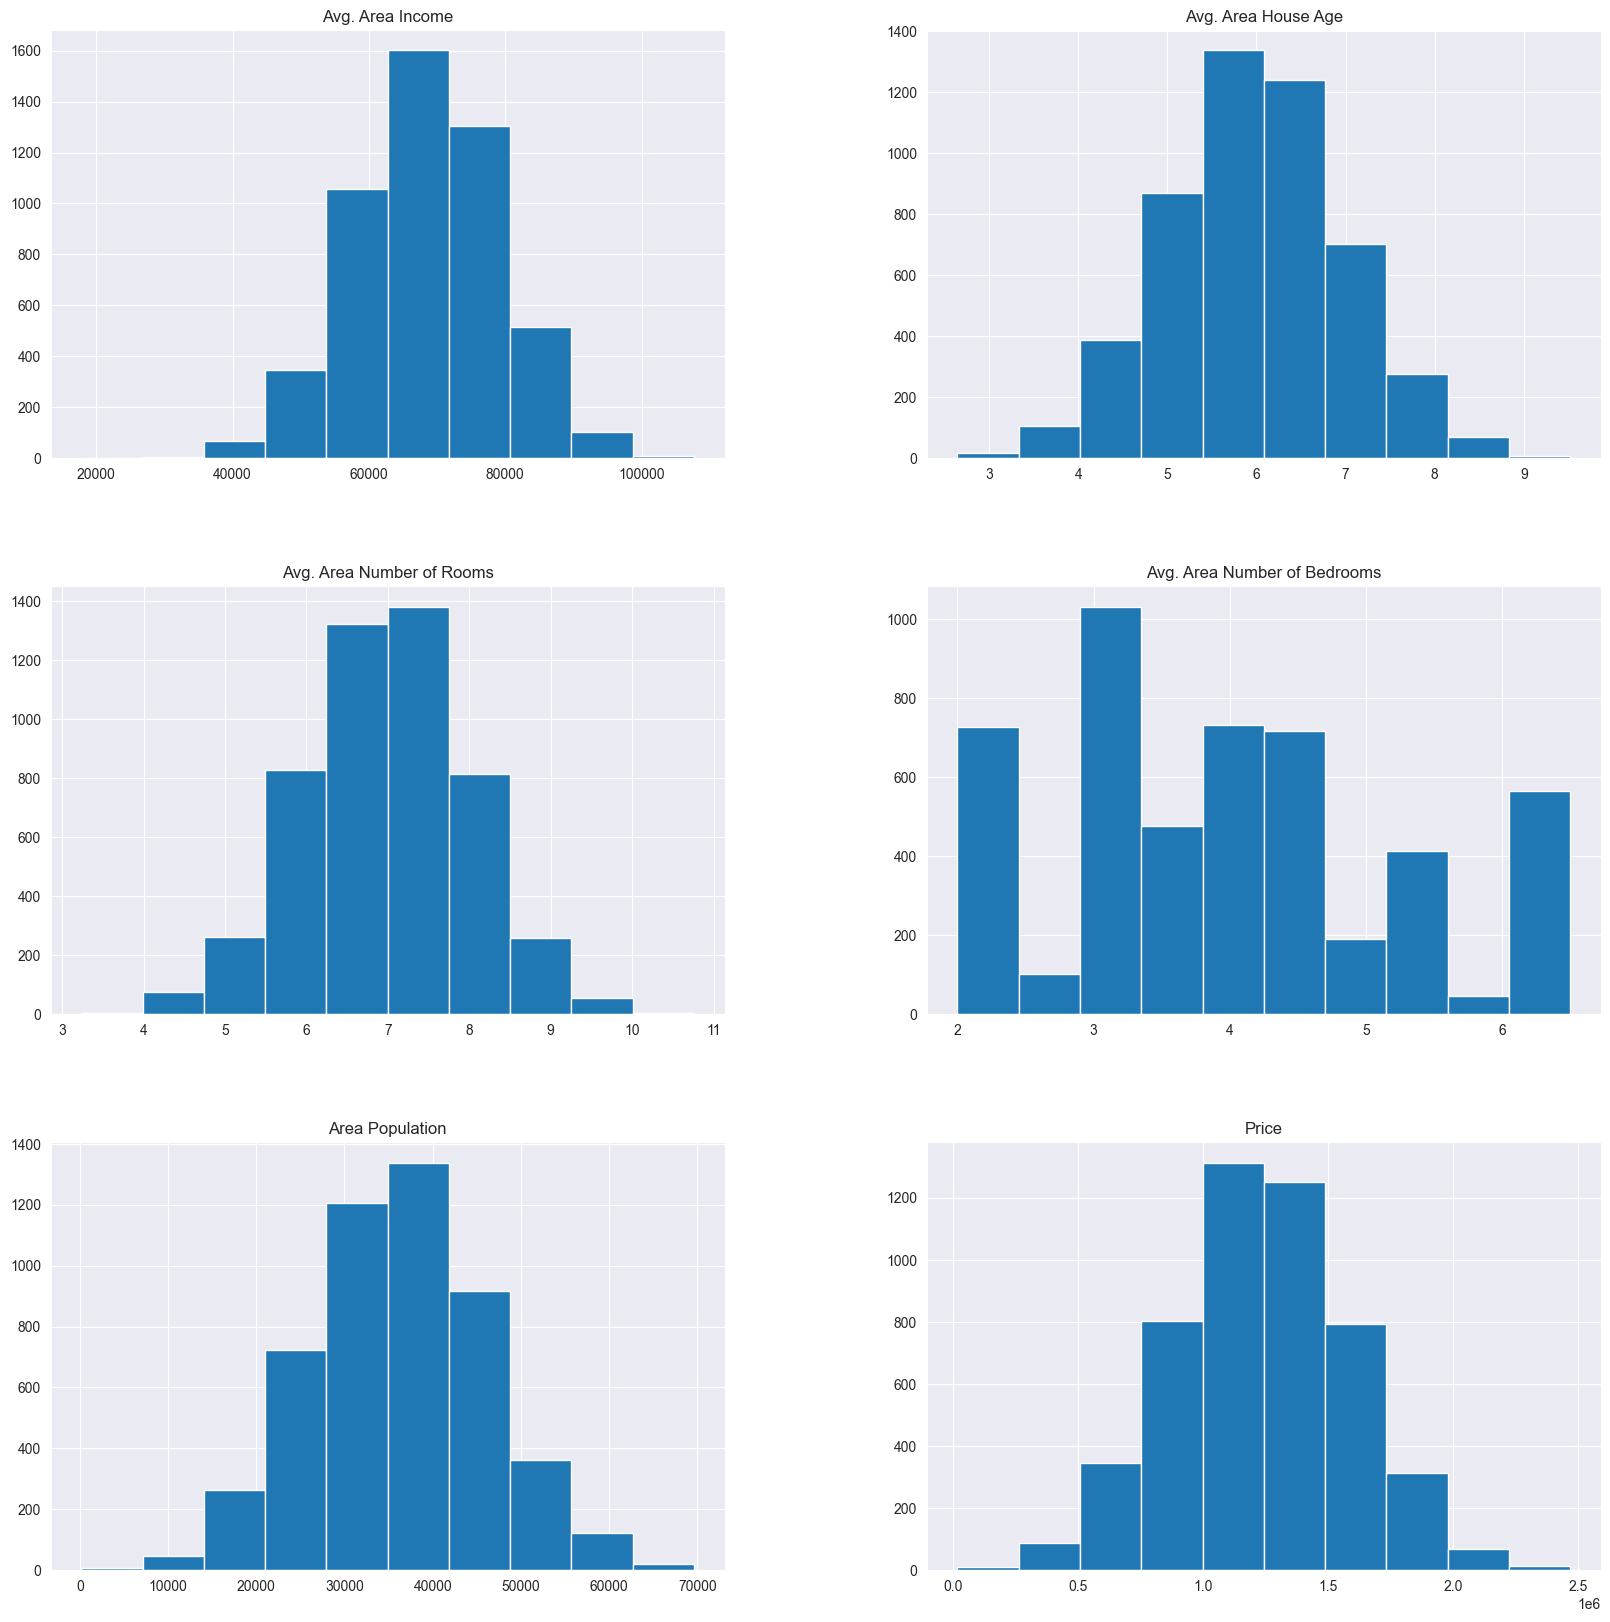

In [80]:
df.hist(figsize=(20,20));

<Figure size 800x600 with 0 Axes>

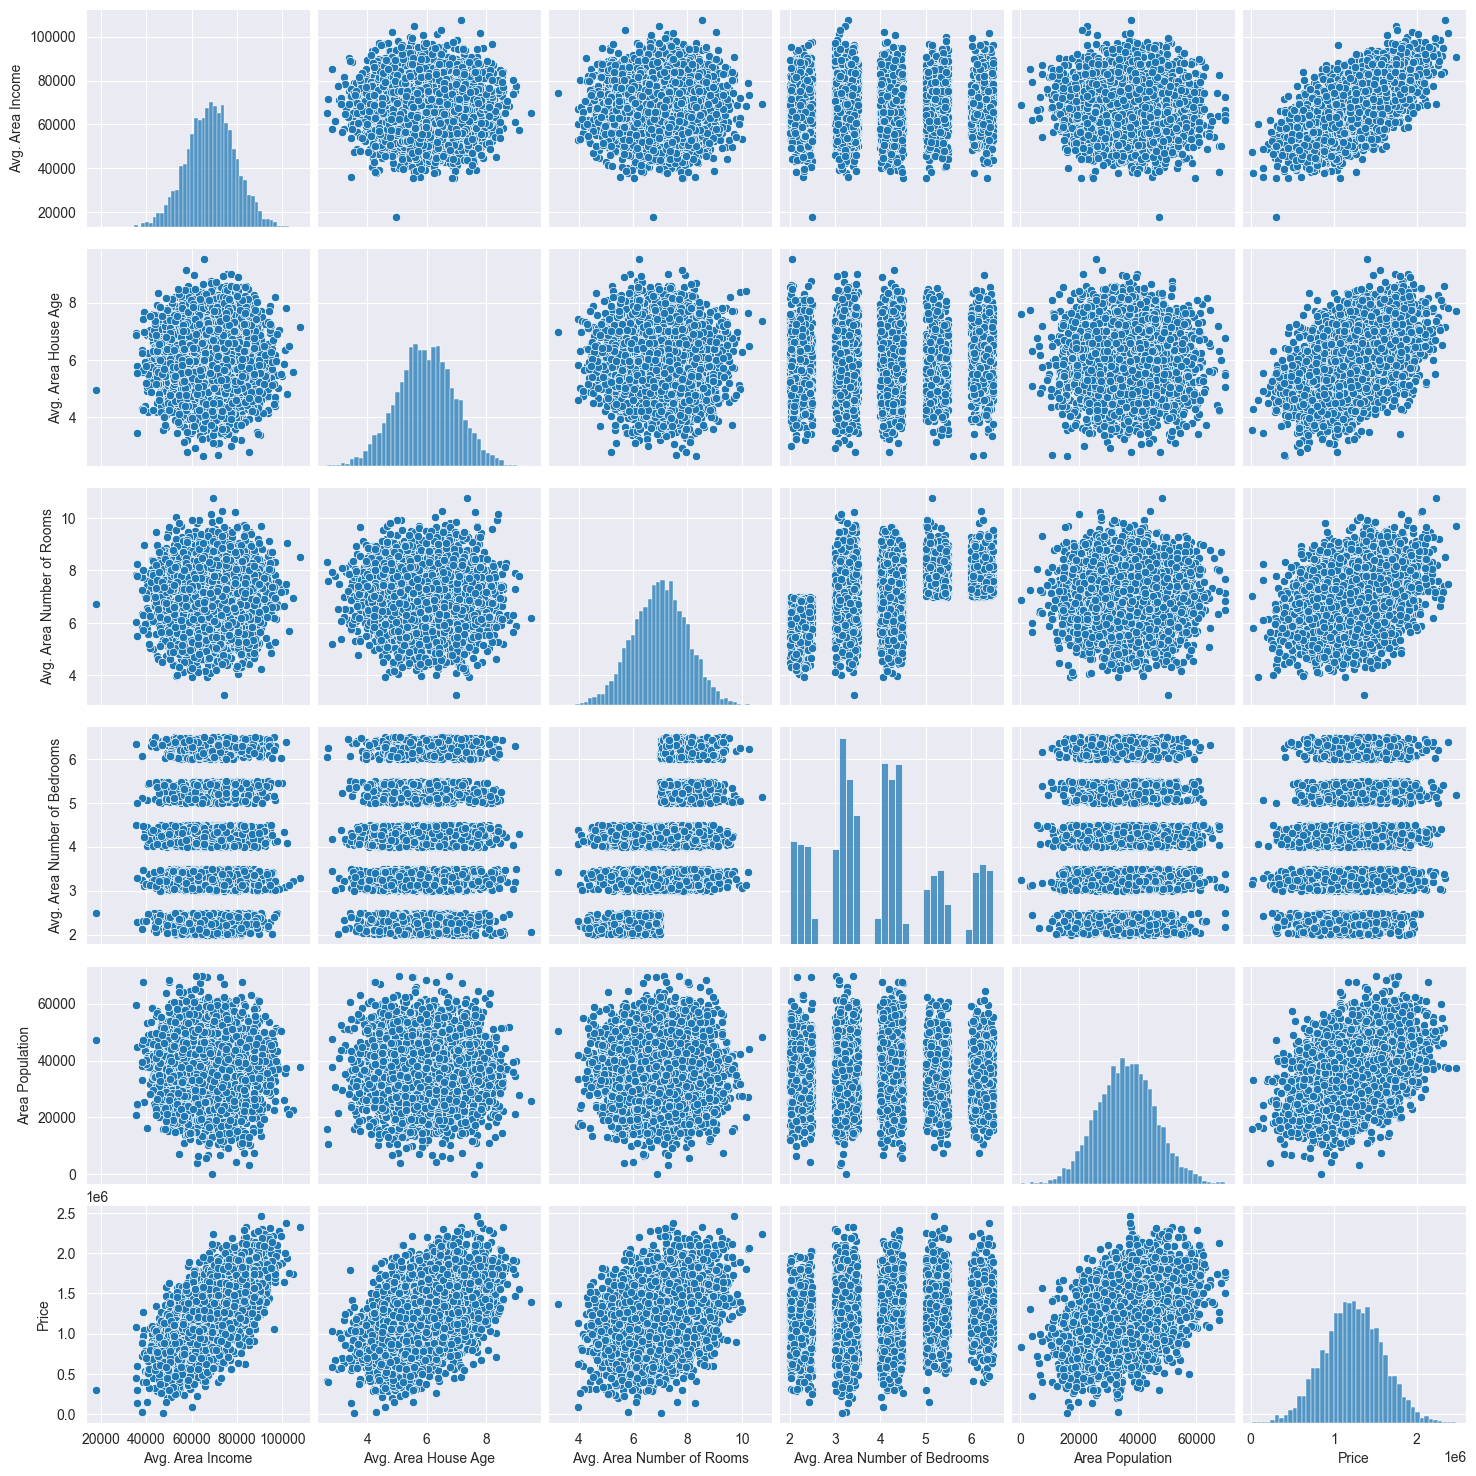

In [81]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: xlabel='Price', ylabel='Density'>

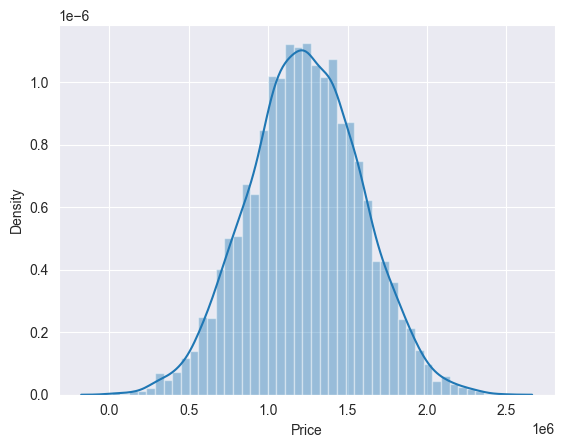

In [82]:
sns.distplot(df['Price'])

<Axes: xlabel='Avg. Area Income', ylabel='Price'>

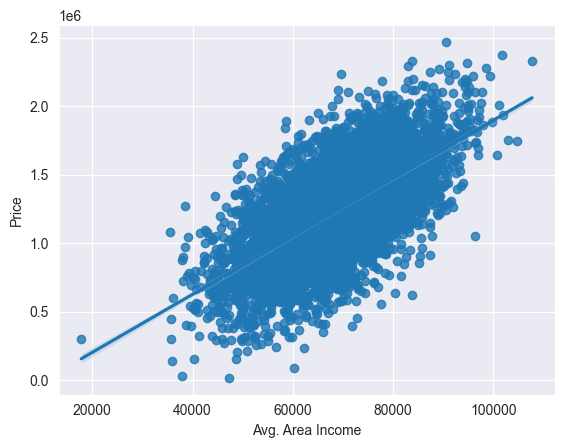

In [83]:
sns.regplot(y='Price', x='Avg. Area Income', data=df)

In [84]:
df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.0000,-0.0020,-0.0110,0.0198,-0.0162,0.6397
Avg. Area House Age,-0.0020,1.0000,-0.0094,0.0061,-0.0187,0.4525
Avg. Area Number of Rooms,-0.0110,-0.0094,1.0000,0.4627,0.0020,0.3357
Avg. Area Number of Bedrooms,0.0198,0.0061,0.4627,1.0000,-0.0222,0.1711
Area Population,-0.0162,-0.0187,0.0020,-0.0222,1.0000,0.4086
Price,0.6397,0.4525,0.3357,0.1711,0.4086,1.0000


<Axes: >

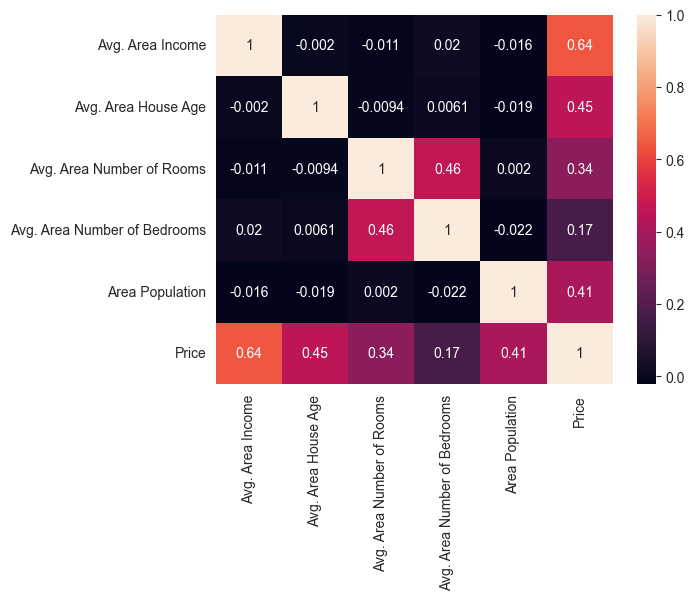

In [85]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population', 'Price']].corr(), annot=True)

In [86]:
df['House Age'] = df['Avg. Area House Age'].apply(int)

<Axes: xlabel='House Age', ylabel='Price'>

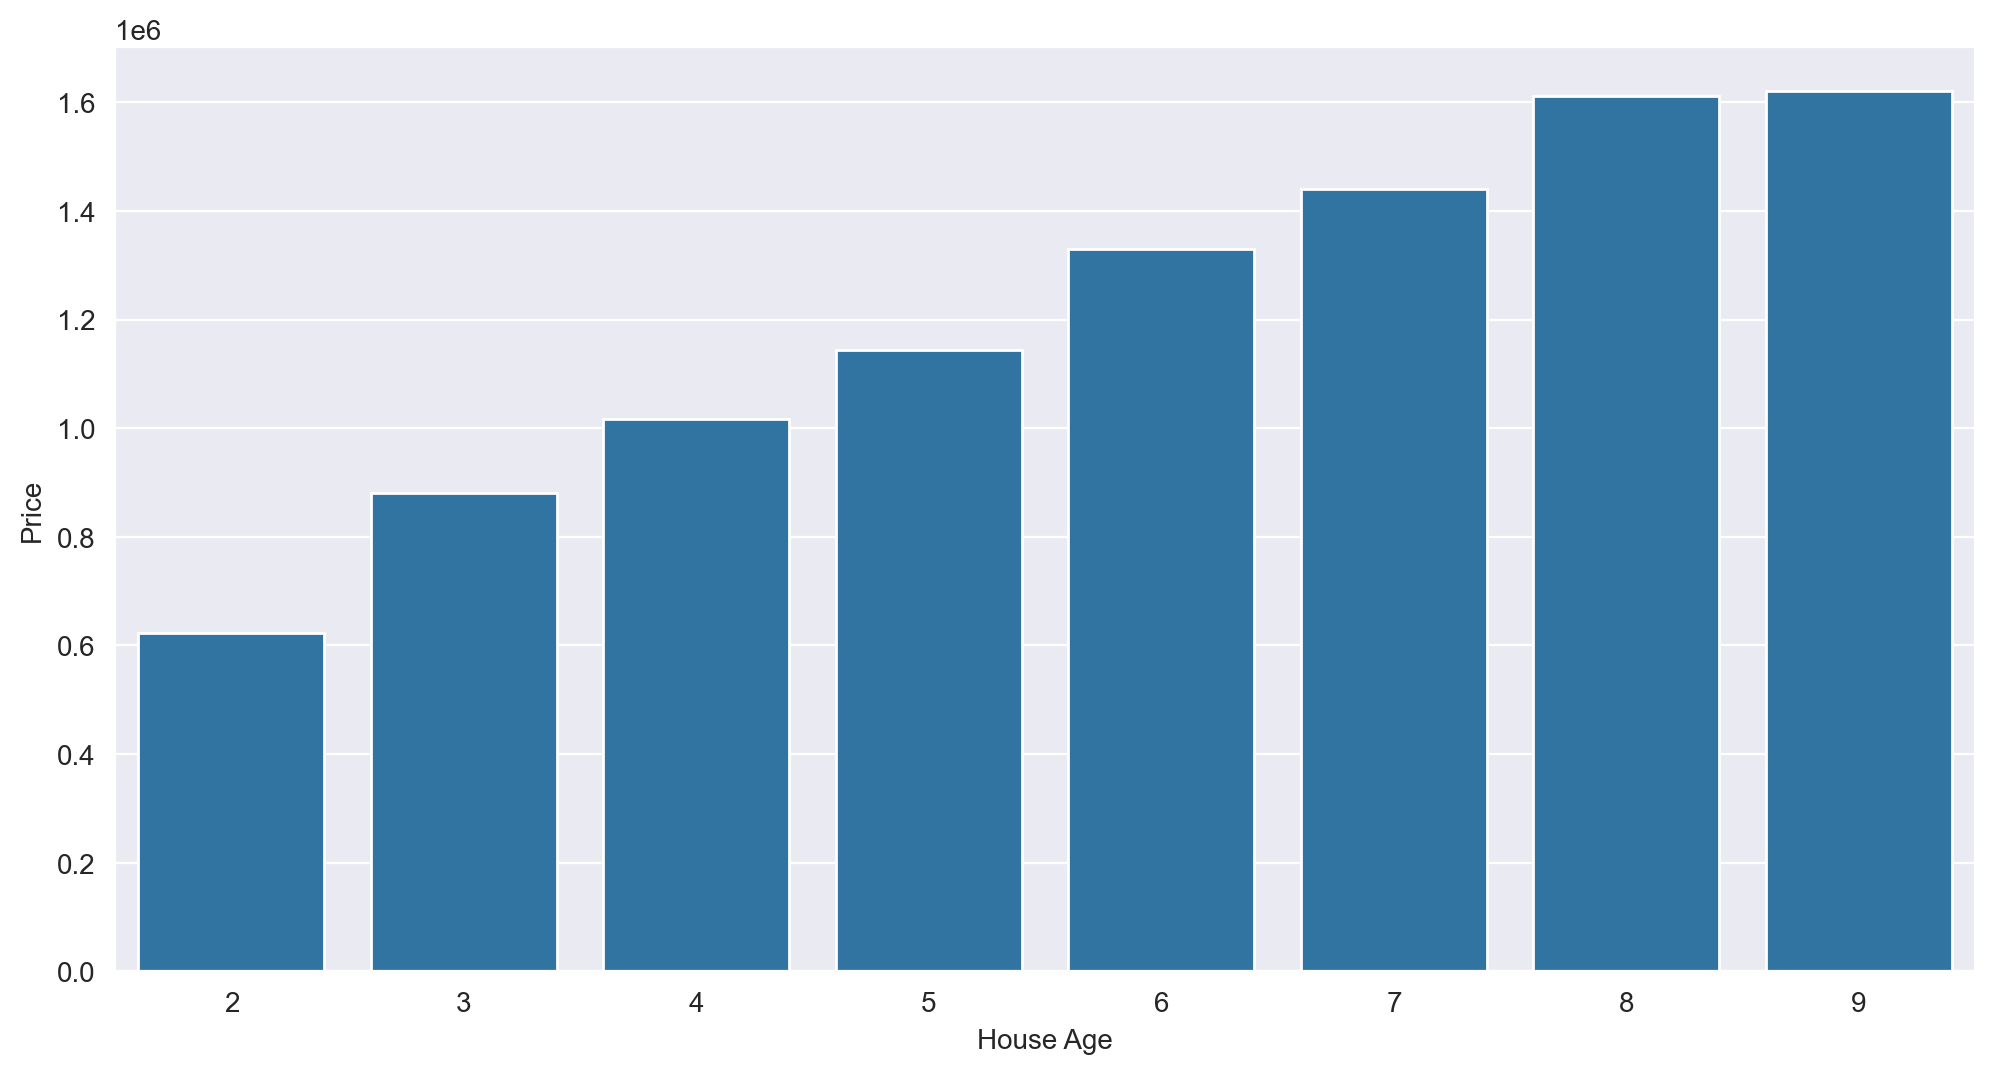

In [87]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'House Age', y = 'Price', data = df, ci = None)

In [88]:
df['Number of Rooms'] = df['Avg. Area Number of Rooms'].apply(int)

<Axes: xlabel='Number of Rooms', ylabel='Price'>

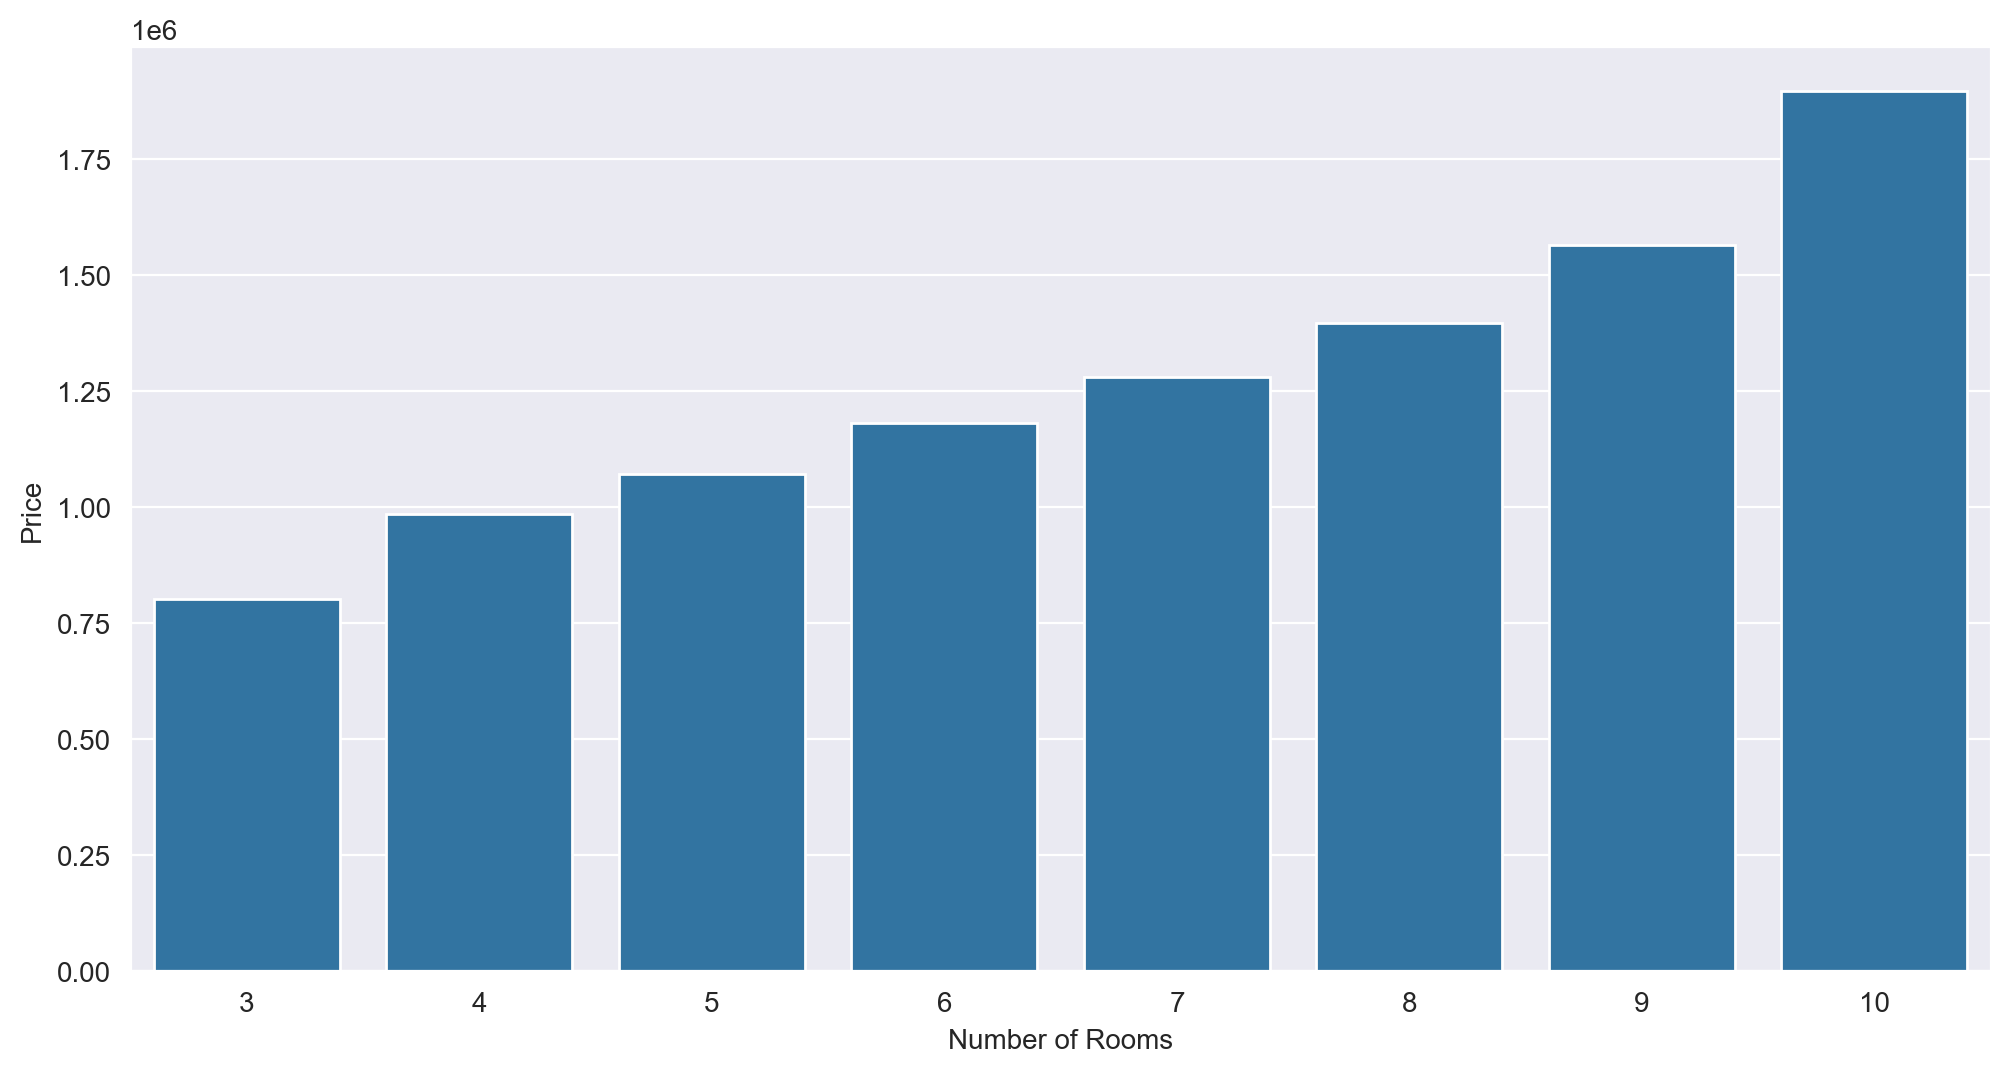

In [89]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Rooms', y = 'Price', data = df, ci = None)

In [90]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(int)

<Axes: xlabel='Number of Bedrooms', ylabel='Price'>

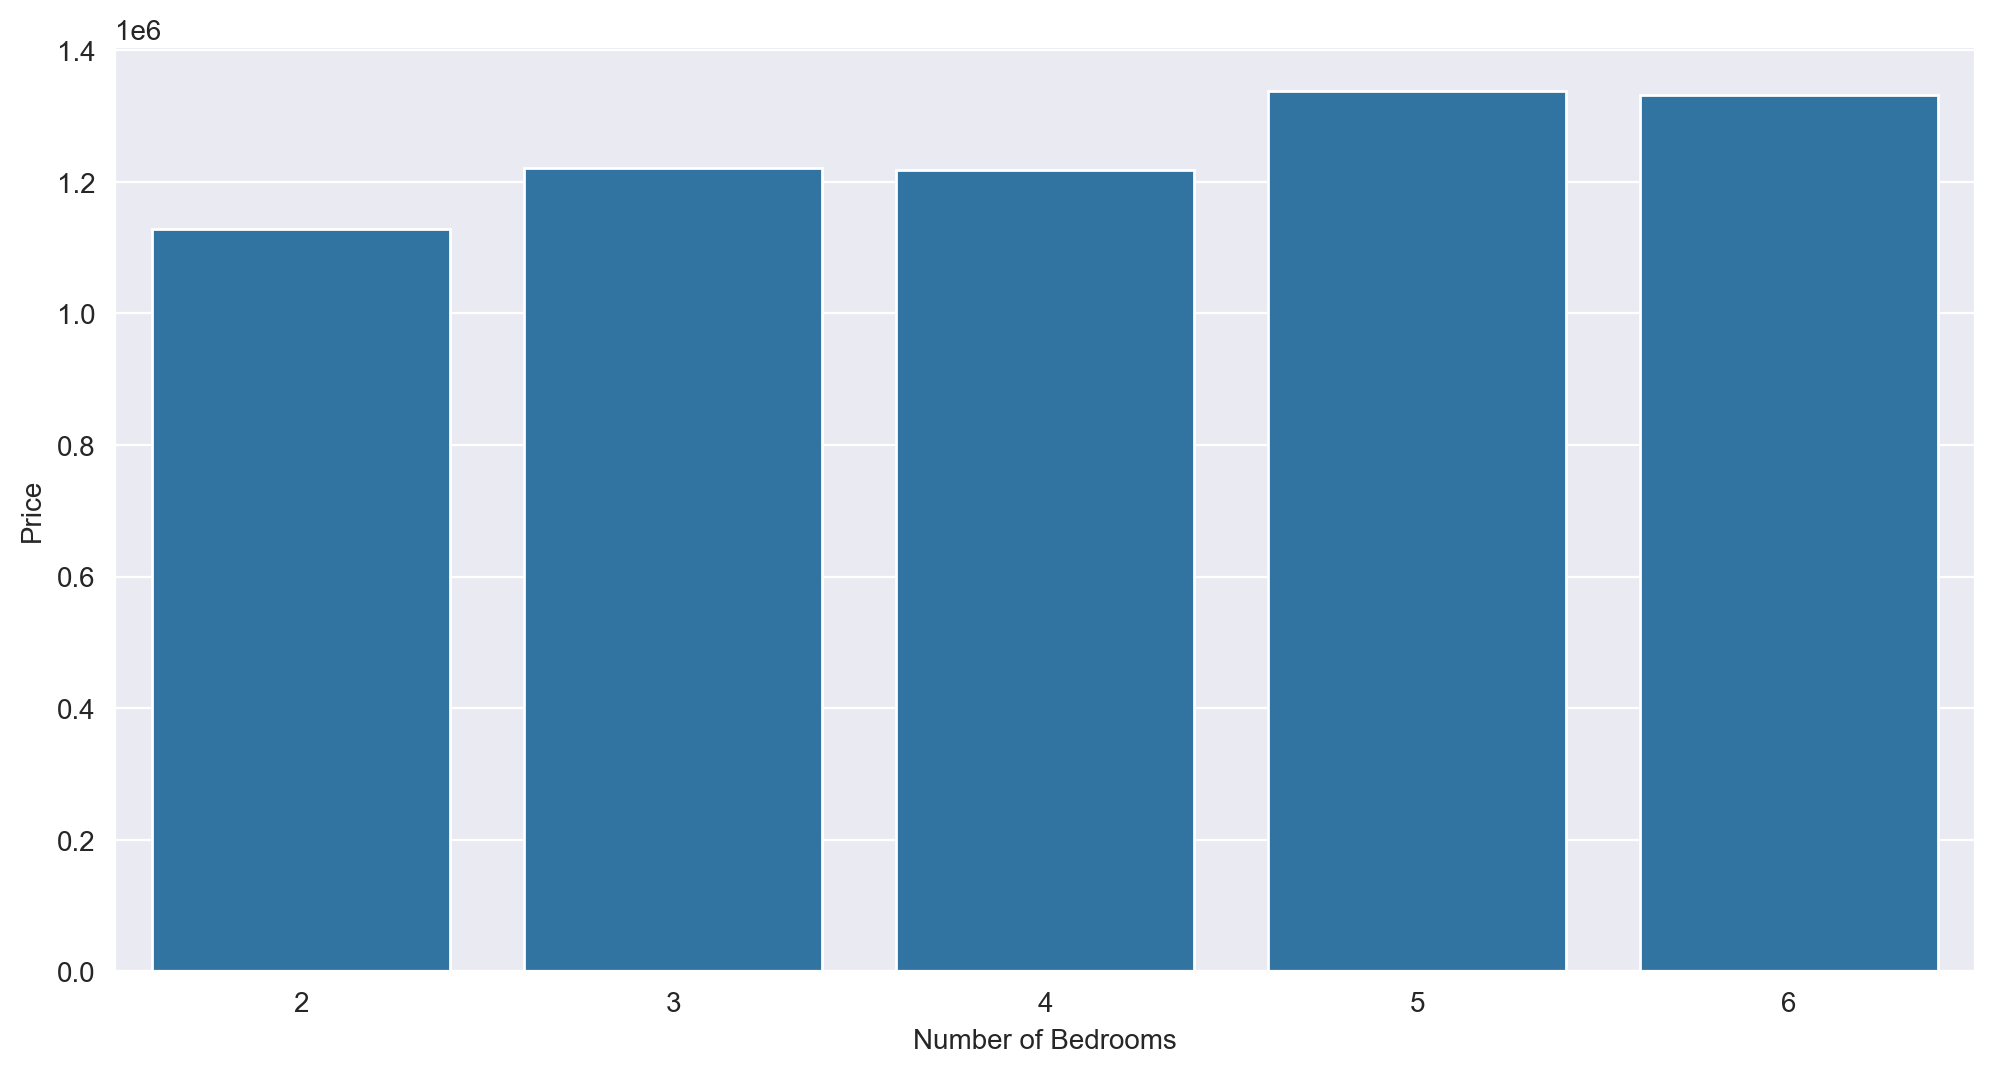

In [91]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.barplot(x = 'Number of Bedrooms', y = 'Price', data = df, ci = None)

### Выбор моделей
1. Линейная регрессия - самая простая модель, хороший базовый вариант. Показывает, насколько хорошо данные поддаются линейному описанию
2. Нейронная сеть - сложная модель, которая может находить нелинейные закономерности.
3. Random Forest - мощная модель, хорошо работает со многими типами данных. 

### Обучение модели линейной регрессии

In [92]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'House Age', 'Number of Rooms', 'Number of Bedrooms'],
      dtype='object')

In [93]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [94]:
y = df['Price']

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Линейная регрессия

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [99]:
lrm.intercept_

np.float64(-2638673.426190169)

In [100]:
lrm.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [101]:
predictions = lrm.predict(X_test)

In [102]:
predictions

array([1308536.13592596, 1237122.72746454, 1243835.62817087, ...,
       1457119.79297217, 1483428.95309281, 1047510.59737215],
      shape=(1500,))

In [103]:
y_test.round(3)

1501   1339096.0770
2586   1251794.1790
2653   1340094.9660
1055   1431507.6230
705    1042373.5240
           ...     
3563   1348221.7650
1538   1309937.3990
1837   1472887.2470
2380   1409762.1190
1912   1009606.2840
Name: Price, Length: 1500, dtype: float64

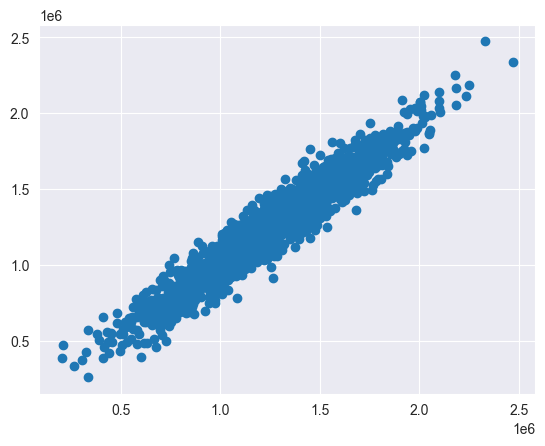

In [104]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price'>

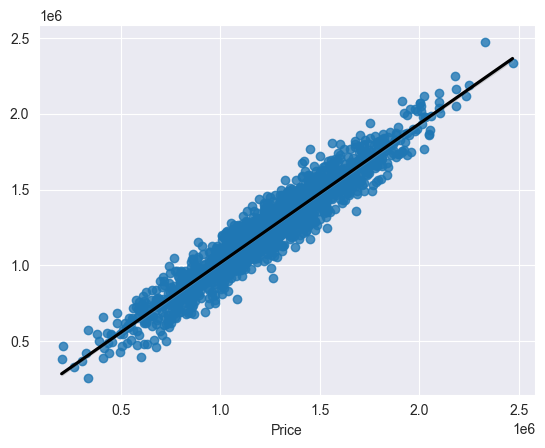

In [105]:
sns.regplot(x=y_test,y=predictions,line_kws={"color":"black"})

<Axes: xlabel='Price', ylabel='Density'>

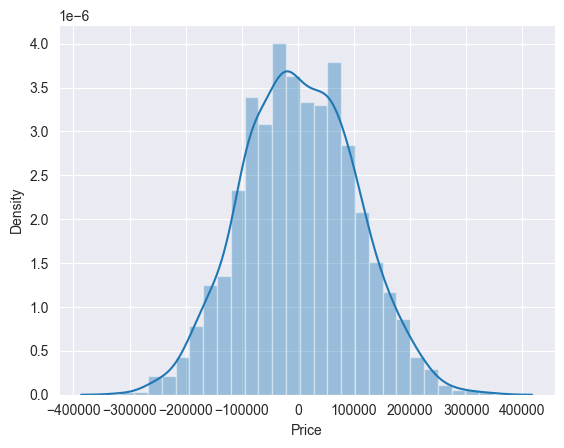

In [106]:
sns.distplot((y_test - predictions))

### Метрики оценки качества регрессии


Общие показатели оценки для задач регрессии:

**Mean Absolute Error** (MAE Средняя абсолютная ошибка) - это среднее значение абсолютного значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE Среднеквадратическая ошибка) - это среднее значение квадратов ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE Среднеквадратическая ошибка) - это квадратный корень из среднего квадрата ошибок:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Коэффициент детерминации** $R^{2}$

$$R^2 = 1 - \frac{\frac{1}{n}\sum^{n}_{i}{(y - y_{pred})^2}}{\frac{1}{n}\sum^{n}_{i}{(y - \bar{y})^2}}$$

In [107]:
from sklearn import metrics

In [108]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336873

In [109]:
metrics.mean_squared_error(y_test, predictions)

10068422551.400822

In [110]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

np.float64(100341.52954485407)

In [111]:
metrics.r2_score(y_test, predictions)

0.9146818498754021

### Random Forest Regression

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=None,        
    min_samples_split=2,   
    min_samples_leaf=1,    
    random_state=42       
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [119]:
print("Random Forest Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
rn_r2_score = r2_score(y_test, y_pred_rf)
rn_mae = mean_absolute_error(y_test, y_pred_rf)
rn_rmse = mean_squared_error(y_test,y_pred_rf)

Random Forest Regression:
R² Score: 0.8824
MAE: $94693.14
RMSE: $120308.30


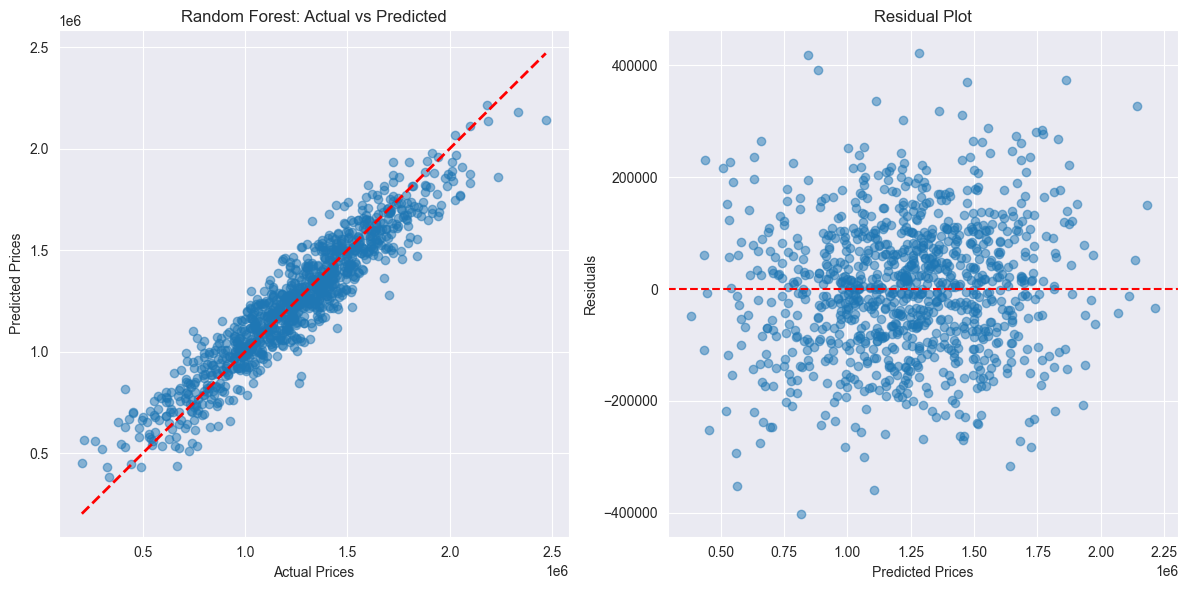

In [120]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

### Обучение модели нейросети для предсказывания цены жилья

Входной слой (32 нейрона): Преобразует 8 исходных признаков жилья в 32 новых признака.

Первый скрытый слой (32 нейрона): Обрабатывает полученные признаки, выявляя сложные взаимосвязи.

Второй скрытый слой (16 нейронов): Сжимает информацию, выделяя самые важные закономерности.

Выходной слой (1 нейрон): Выдает итоговое предсказание цены жилья.

In [121]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [122]:
X = df.drop(['Address', 'Price'], axis=1)

In [123]:
y = df['Price']

In [124]:
# Стандартизация данных
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

X_val_scaled = scaler_X.transform(X_val)
y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1)).flatten()

In [125]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape=(8,), activation='relu', name='input'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_1'),
        tf.keras.layers.Dense(16, activation='relu', name='hidden_2'),
        tf.keras.layers.Dense(1, name='output')
    ])

In [126]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [127]:
# Обучение
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4205 - mae: 0.4873 - mse: 0.4205 - val_loss: 0.1318 - val_mae: 0.2928 - val_mse: 0.1318
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.1034 - mae: 0.2560 - mse: 0.1034 - val_loss: 0.1053 - val_mae: 0.2608 - val_mse: 0.1053
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.0918 - mae: 0.2420 - mse: 0.0918 - val_loss: 0.1012 - val_mae: 0.2572 - val_mse: 0.1012
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0867 - mae: 0.2366 - mse: 0.0867 - val_loss: 0.1011 - val_mae: 0.2567 - val_mse: 0.1011
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0841 - mae: 0.2330 - mse: 0.0841 - val_loss: 0.0984 - val_mae: 0.2547 - val_mse: 0.0984
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0826 - mae: 0.2307 - mse: 0.0826 - val_loss: 0.1008 - val_mae: 0.2571 - val_mse: 0.1008
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 0.0820 - mae: 0.2301 - mse: 0.0820 

In [128]:
y_pred_scaled = model.predict(X_test_scaled).flatten()

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step


In [129]:
y_pred_scaled

array([ 0.36199933,  0.05745392,  0.03388502, ...,  0.6218896 ,
        0.6618502 , -0.49154738], shape=(1500,), dtype=float32)

In [130]:
# Обратное масштабирование цен
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

MAE: $84,913.91
RMSE: $104,872.71
R² Score: 0.9068


<Axes: >

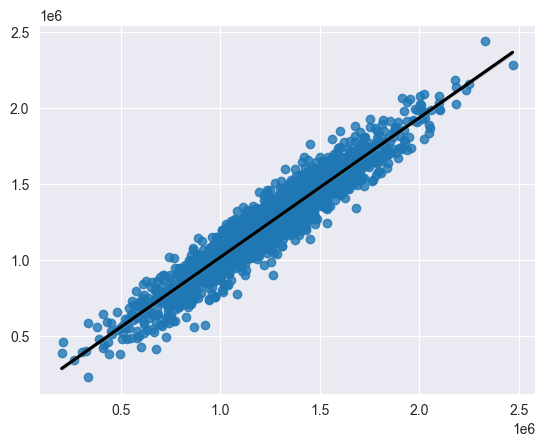

In [132]:
sns.regplot(x=y_test_original, y=y_pred, line_kws={"color":"black"})

<Axes: ylabel='Density'>

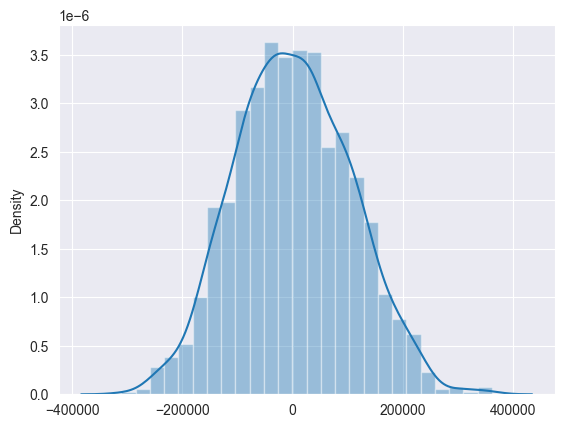

In [133]:
sns.distplot((y_test_original - y_pred))

### Сравнение моделей


In [134]:
lr_mae = mean_absolute_error(y_test, predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, predictions))
lr_r2 = r2_score(y_test, predictions)
nn_mae = mean_absolute_error(y_test, y_pred)
nn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
nn_r2 = r2_score(y_test, y_pred)

In [136]:
print("=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===")
print(f"MAE: ${lr_mae:,.2f}")
print(f"RMSE: ${lr_rmse:,.2f}")
print(f"R²: {lr_r2:.4f}")
print("\n=== RANDOM FOREST REGRESSOR ===")
print(f"MAE: ${rn_mae:,.2f}")
print(f"RMSE: ${rn_rmse:,.2f}")
print(f"R²: {rn_r2_score:.4f}")
print("\n=== НЕЙРОННАЯ СЕТЬ ===")
print(f"MAE: ${nn_mae:,.2f}")
print(f"RMSE: ${nn_rmse:,.2f}")
print(f"R²: {nn_r2:.4f}")

=== ЛИНЕЙНАЯ РЕГРЕССИЯ ===
MAE: $81,135.57
RMSE: $100,341.53
R²: 0.9147

=== RANDOM FOREST REGRESSOR ===
MAE: $94,693.14
RMSE: $14,474,088,052.34
R²: 0.8824

=== НЕЙРОННАЯ СЕТЬ ===
MAE: $84,913.91
RMSE: $104,872.71
R²: 0.9068


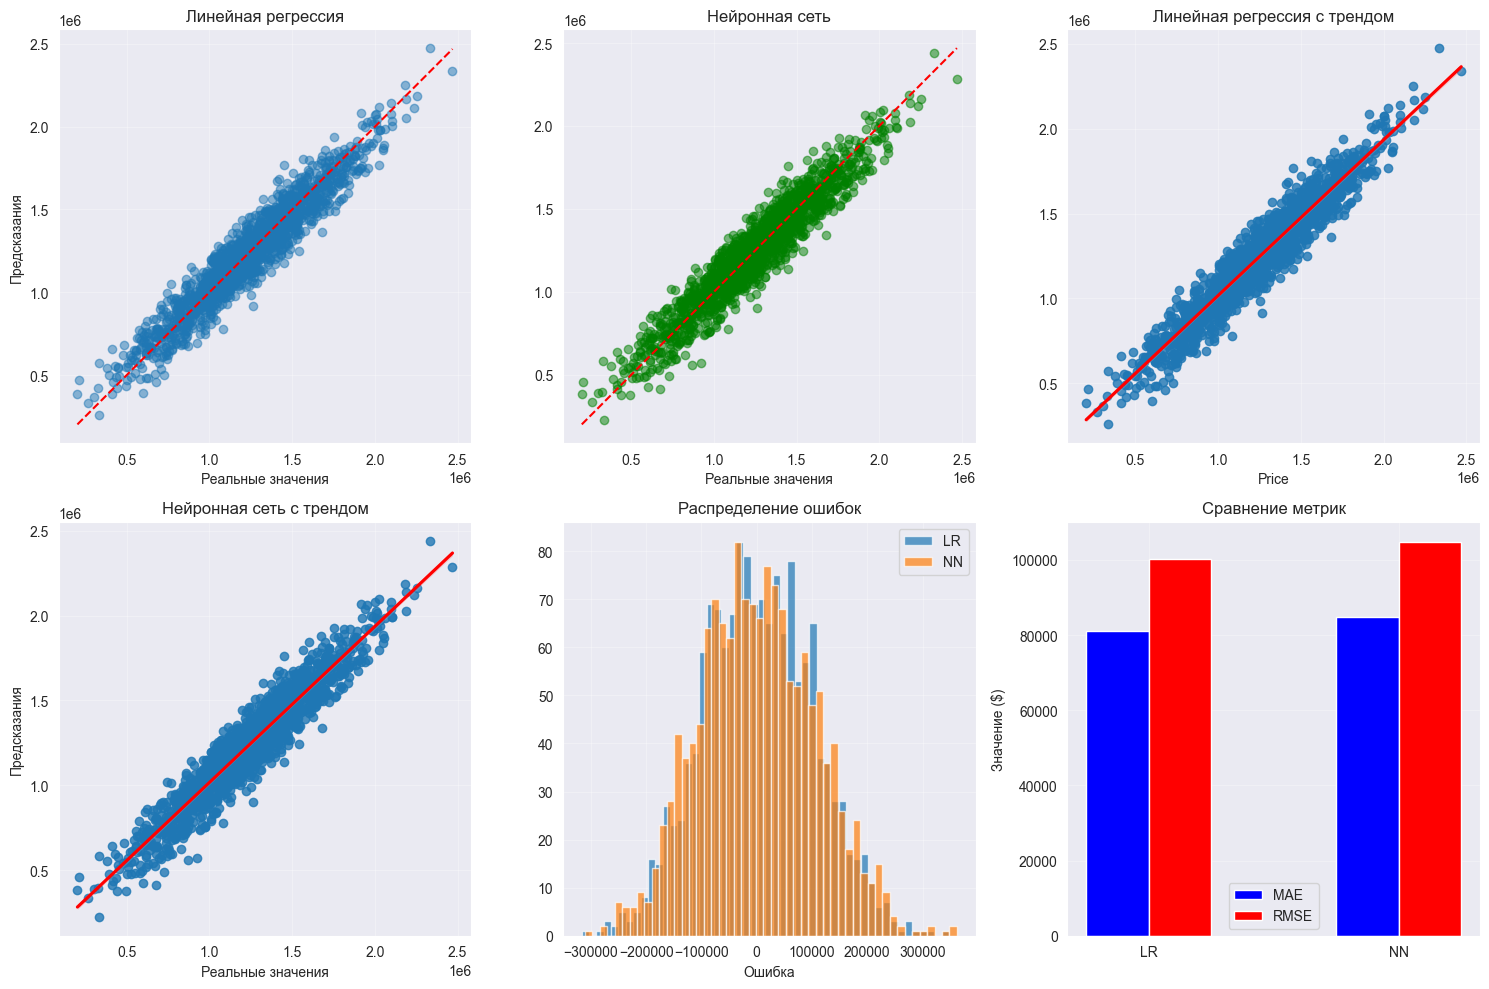

In [145]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(y_test, predictions, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 0].set_title('Линейная регрессия')
axes[0, 0].set_xlabel('Реальные значения')
axes[0, 0].set_ylabel('Предсказания')

axes[0, 1].scatter(y_test, y_pred, alpha=0.5, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 1].set_title('Нейронная сеть')
axes[0, 1].set_xlabel('Реальные значения')

sns.regplot(x=y_test, y=predictions, ax=axes[0, 2], line_kws={"color": "red"})
axes[0, 2].set_title('Линейная регрессия с трендом')

sns.regplot(x=y_test, y=y_pred, ax=axes[1, 0], line_kws={"color": "red"})
axes[1, 0].set_title('Нейронная сеть с трендом')
axes[1, 0].set_xlabel('Реальные значения')
axes[1, 0].set_ylabel('Предсказания')

axes[1, 1].hist(y_test - predictions, bins=50, alpha=0.7, label='LR')
axes[1, 1].hist(y_test - y_pred, bins=50, alpha=0.7, label='NN')
axes[1, 1].set_title('Распределение ошибок')
axes[1, 1].set_xlabel('Ошибка')
axes[1, 1].legend()

x = np.arange(2) 
width = 0.25

axes[1, 2].bar(x - width/2, [lr_mae, nn_mae], width, label='MAE', color='blue')
axes[1, 2].bar(x + width/2, [lr_rmse, nn_rmse], width, label='RMSE', color='red')
axes[1, 2].set_title('Сравнение метрик')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['LR', 'NN'])
axes[1, 2].set_ylabel('Значение ($)')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

for i, ax in enumerate(axes.flat):
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Вывод

В ходе работы была обучена модель на 4 слоях. Датасет имел весьма разбросанные диапазоны данных. Самое важное: диапазон цены от 16.000 до 2.5 миллионов долларов. За 33 обучения модели обучилась до следующих параметров:
 * MAE (Средняя абсолютная ошибка): $84,996.54
 * RMSE (Среднеквадратическая ошибка): $105,679.67
 * R² Score: 0.9054

Кроме нейронной сети и линейной регрессии, также была протестирована модель Random Forest Regressor (100 деревьев). Однако ее результаты оказались значительно хуже по сравнению с другими моделями.

Для данной задачи предсказания цен на жилье линейная регрессия является оптимальным выбором. Она обеспечивает лучшую точность при минимальной сложности модели. Несмотря на масштабирование данных и использование нейронной сети с 3 скрытыми слоями, а также более сложной модели Random Forest с 100 деревьями, простая линейная регрессия показала себя лучше.

Линейная регрессия показала лучшие результаты по всем метрикам по сравнению с другими моделями:
 * По сравнению с Random Forest:
   - MAE: $81,135.57 (меньше на $13,557.57)
   - RMSE: $100,341.53 (значительно меньше)
   - R²: 0.9147 (выше на 0.0323)
   
 * По сравнению с нейронной сетью:
   - MAE: $81,135.57 (меньше на $3,778.34)
   - RMSE: $100,341.53 (меньше на $4,531.18)
   - R²: 0.9147 (выше на 0.0079)

Случайный лес показал особенно плохие результаты по метрике RMSE, что указывает на наличие значительных ошибок в отдельных предсказаниях этой модели.

Выполнил: Кабанов Илья, 22П-2